# USE AI to do EDA at fast pace
**Author Name:** Danish Azeem\
**Email:** danishazeem365@gmail.com

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck      

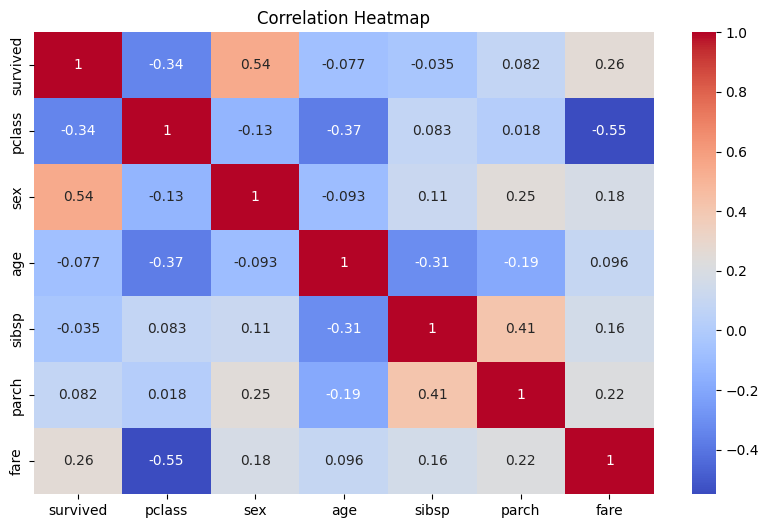

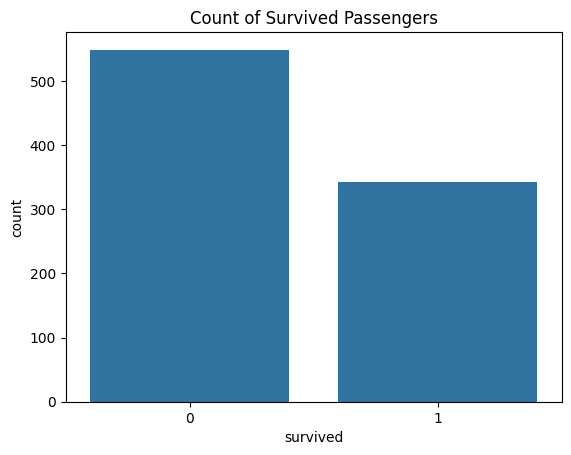

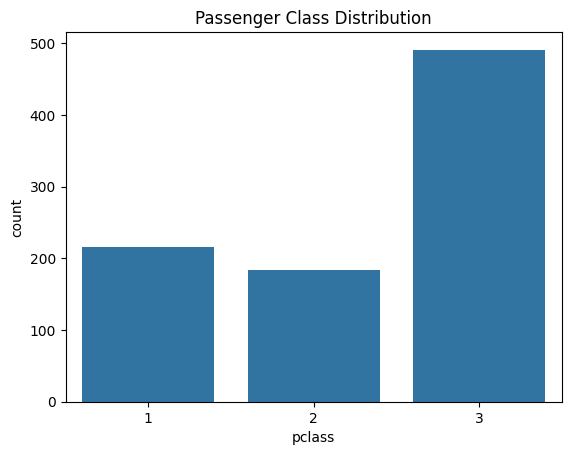

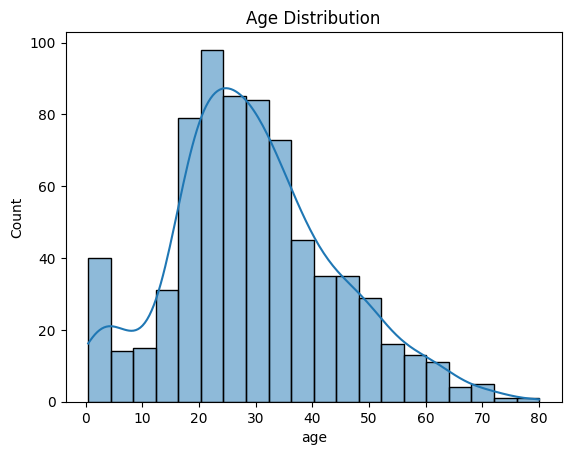

C:\Users\Danish\AppData\Local\Temp\ipykernel_1032\4110024529.py:82: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


In [10]:

# To perform Exploratory Data Analysis (EDA) on the Titanic dataset using Python with basic libraries like pandas, numpy, matplotlib, and seaborn, here is the full code including handling categorical data and data visualization:

### Step 1: Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset

df = sns.load_dataset("titanic")


### Step 3: Display the First Few Rows of the Dataset

print(df.head())


### Step 4: Check for Missing Values

print(df.isnull().sum())


### Step 5: Summary Statistics

print(df.describe())


### Step 6: Handle Categorical Data

# Map 'sex' categories to numerical values
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

# Map 'class' categories to numerical values
df['class'] = df['class'].map({'First': 1, 'Second': 2, 'Third': 3})

# One-hot encode 'embarked' column
df = pd.get_dummies(df, columns=['embarked'], prefix='embarked')

# Convert any necessary columns to float if needed
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category').cat.codes

# Drop non-numeric columns for correlation calculation
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_cols]

# Generate correlation matrix
correlation_matrix = df_numeric.corr()

# Generate heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### Step 7: Data Visualization

# Countplot of Survived Passengers
sns.countplot(x='survived', data=df)
plt.title('Count of Survived Passengers')
plt.show()

# Distribution of Passenger Classes
sns.countplot(x='pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()

# Age Distribution
sns.histplot(df['age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()


### Step 8: Additional Analysis

# Example: Fill missing values in 'age' column with the mean
df['age'].fillna(df['age'].mean(), inplace=True)

# Proceed with further analysis as needed


# By following these steps and code snippets, you can effectively conduct EDA on the Titanic dataset using Python with the specified

In [11]:
# Calculate the IQR (Interquartile Range) for 'age' and 'fare' columns
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound_age = Q1 - 1.5 * IQR
upper_bound_age = Q3 + 1.5 * IQR

# Remove outliers from 'age' column
df = df[(df['age'] >= lower_bound_age) & (df['age'] <= upper_bound_age)]

# Repeat the process for the 'fare' column
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound_fare = Q1 - 1.5 * IQR
upper_bound_fare = Q3 + 1.5 * IQR

df = df[(df['fare'] >= lower_bound_fare) & (df['fare'] <= upper_bound_fare)]


In [13]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize MinMaxScaler
min_max_scaler = MinMaxScaler()

# Initialize StandardScaler
standard_scaler = StandardScaler()

# Define the columns to scale (assuming you want to scale all numeric columns)
columns_to_scale = ['age', 'fare']  # Update with your specific column names

# Perform Min-Max scaling
df_scaled_min_max = df.copy()
df_scaled_min_max[columns_to_scale] = min_max_scaler.fit_transform(df[columns_to_scale])

# Perform Standardization (Z-score scaling)
df_scaled_standard = df.copy()
df_scaled_standard[columns_to_scale] = standard_scaler.fit_transform(df[columns_to_scale])


In [16]:
# Fill NaN values in 'Age' column with the mean of the column
df['Age'] = df['age'].fillna(df['age'].mean())

# Fill NaN values in 'Fare' column with the median of the column
df['Fare'] = df['fare'].fillna(df['fare'].median())


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 718 entries, 0 to 890
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     718 non-null    int64   
 1   pclass       718 non-null    int64   
 2   sex          718 non-null    int64   
 3   age          718 non-null    float64 
 4   sibsp        718 non-null    int64   
 5   parch        718 non-null    int64   
 6   fare         718 non-null    float64 
 7   class        718 non-null    category
 8   who          718 non-null    int8    
 9   adult_male   718 non-null    bool    
 10  deck         96 non-null     category
 11  embark_town  718 non-null    int8    
 12  alive        718 non-null    int8    
 13  alone        718 non-null    bool    
 14  embarked_C   718 non-null    bool    
 15  embarked_Q   718 non-null    bool    
 16  embarked_S   718 non-null    bool    
 17  Age          718 non-null    float64 
 18  Fare         718 non-null    float6

In [18]:
df.describe()

,survived,pclass,sex,age,sibsp,parch,fare,who,embark_town,alive,Age,Fare
count,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000
mean,0.334262,2.512535,0.318942,28.462754,0.413649,0.317549,17.193204,1.199164,1.611421,0.334262,28.462754,17.193204
std,0.472061,0.715818,0.466391,10.034525,0.855001,0.784792,13.244507,0.559587,0.726646,0.472061,10.034525,13.244507
min,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.889575,1.000000,2.000000,0.000000,22.000000,7.889575
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,11.750000,1.000000,2.000000,0.000000,29.699118,11.750000
75%,1.000000,3.000000,1.000000,32.875000,1.000000,0.000000,25.928150,2.000000,2.000000,1.000000,32.875000,25.928150
max,1.000000,3.000000,1.000000,54.000000,5.000000,6.000000,61.379200,2.000000,2.000000,1.000000,54.000000,61.379200


Assighnment: Performe eda on aney dataset